# Section 2-7- Perceptron
[intereting article](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [2]:
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,:-1]
y = data[:,-1]

In [3]:
df = pd.DataFrame(data, columns=['X1', 'X2', 'Label'])
df.head()

,X1,X2,Label
0,0.78051,-0.063669,1.0
1,0.28774,0.291390,1.0
2,0.40714,0.178780,1.0
3,0.29230,0.421700,1.0
4,0.50922,0.352560,1.0


In [4]:
groups = df.groupby("Label")

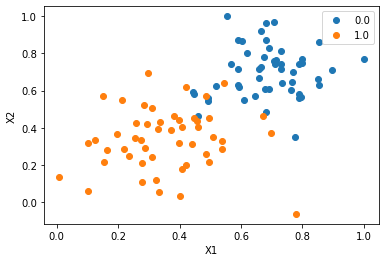

In [5]:
for name, group in groups:
    plt.plot(group["X1"], group["X2"], marker="o", linestyle="", label=name)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

In [6]:
def stepFunction(t):
    """ Simple step function.
        Input: t is the independent variable
        Output: return f(t) and it is either 1 or 0 dependent on the value of the independent
    """
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    """ Wrapper function. 
        Input: dataset X (np.array), Weights W (np.array), bias (scalar)
        Output: value for the equation that can be used in by step function to determine if positive or negative
    """
    return stepFunction((np.matmul(X, W) + b)[0])   # [0] is required to extract the scalar from the np.array([])

In [24]:
# Implement the perceptron trick.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    """ Update the weights (W) and bias (b) according to the perceptron algorithm.
        Inputs:data X, labels y, weights W (as an array), bias b and learning rate.
        Output: tuple (W, b)
    """
    for i in range(len(X)):               # Iterate overa all the points
        y_hat = prediction(X[i], W, b)    # Calculate a prediction for the point X[i] = (x_1, x_2)
        
        # Update the weights based on if the value is pos/negative and the learning-rate
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [25]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    """ Runs perceptron algorithm repeatedly.
        Input: Dataset X (np.array), labels y (np.array), learning rate and number of iterations
        Outputs: boundary lines obtained in the iterations for plotting purposes. 
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    
    # Generate starting points for weights and bias.
    W = np.array(np.random.rand(2,1))                 # Creates a 2X1 vector
    b = np.random.rand(1)[0] + x_max                  # by taking the [0] element you get a scalar x from a np.array([x])
    
    boundary_lines = []                               # These are the solution lines that get plotted below.
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate) # In each epoch, we apply the perceptron step.
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines                             # return slopes and intercepts in x_2 = m*x_1 + intercept

In [38]:
lines_attributes = trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=250)

In [39]:
# Create the x axis for the boundary
x_min, x_max = min(X.T[0]), max(X.T[0])
print(x_min, x_max)
tick = (x_max-x_min)/10
x_plot = np.arange(x_min, x_max, tick)
x_plot

0.0084492 1.0


array([0.0084492 , 0.10760428, 0.20675936, 0.30591444, 0.40506952,
       0.5042246 , 0.60337968, 0.70253476, 0.80168984, 0.90084492])

slope = [-0.91864219], intercept = [0.97439738]


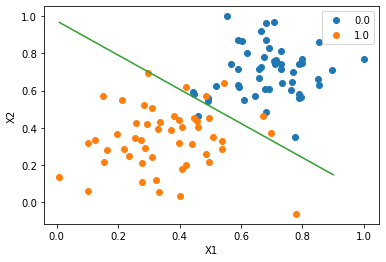

In [40]:
for name, group in groups:
    plt.plot(group["X1"], group["X2"], marker="o", linestyle="", label=name)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

line = lines_attributes[24]   # show the last boundary
slope = line[0]
intercept = line[1]
print(f"slope = {slope}, intercept = {intercept}")
y_plot = slope * x_plot + intercept
plt.plot(x_plot, y_plot)